In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

url ="https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url, sep=",")

print("Vista previa del dataset:")
print(df.head())


print("\nInformación del dataset:")
print(df.info())

Vista previa del dataset:
   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


In [13]:
print("Conteo de valores nulos por columna:")
print(df.isnull().sum()) 

Conteo de valores nulos por columna:
Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64


In [14]:
x = df[['TV', 'radio', 'newspaper']]

y = df['sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Datos de entrenamiento {x_train.shape} pruebas {x_test.shape}")

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



Datos de entrenamiento (160, 3) pruebas (40, 3)


In [ ]:

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
rmse=np.sqrt(mse)
mae= np.mean(np.abs(y_test - y_pred))

print("Error cuadrático medio:", mse)
print("R^2:", r2)
print("Raíz del error cuadrático medio:", rmse)
print("Error absoluto medio:", mae)

Error cuadrático medio: 3.1740973539761033
R^2: 0.899438024100912
Raíz del error cuadrático medio: 1.78159966153345
Error absoluto medio: 1.4607567168117597


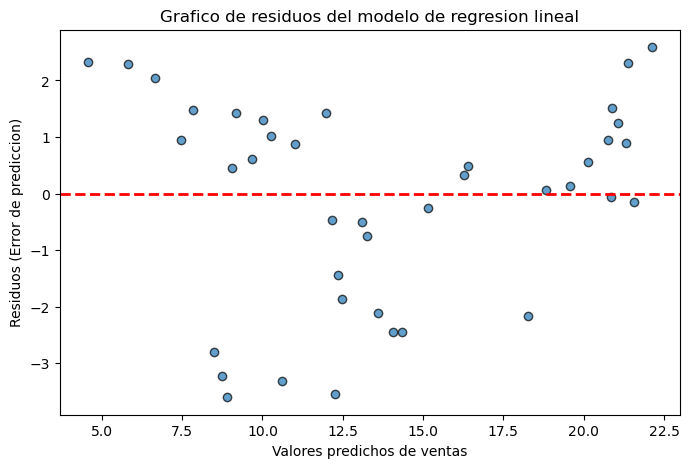

In [17]:
import matplotlib.pyplot as plt
residuos = y_test - y_pred
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuos, alpha = 0.7, edgecolors='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title("Grafico de residuos del modelo de regresion lineal")
plt.xlabel("Valores predichos de ventas")
plt.ylabel("Residuos (Error de prediccion)")
plt.show()